In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pylab
from pylab import rcParams
import statsmodels.api as sm
import statistics
from scipy import stats
import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from scipy.stats import chisquare
from scipy.stats import chi2_contingency

In [2]:
df = pd.read_csv(r'C:\Users\dre2\Desktop\WGU\D208\churn_clean.csv')
nulls = df.isnull().any()
print(nulls)

CaseOrder               False
Customer_id             False
Interaction             False
UID                     False
City                    False
State                   False
County                  False
Zip                     False
Lat                     False
Lng                     False
Population              False
Area                    False
TimeZone                False
Job                     False
Children                False
Age                     False
Income                  False
Marital                 False
Gender                  False
Churn                   False
Outage_sec_perweek      False
Email                   False
Contacts                False
Yearly_equip_failure    False
Techie                  False
Contract                False
Port_modem              False
Tablet                  False
InternetService         False
Phone                   False
Multiple                False
OnlineSecurity          False
OnlineBackup            False
DeviceProt

In [3]:
df['churn_dummy'] = [1 if v == 'Yes' else 0 for v in df['Churn']]

In [4]:
print(df)


      CaseOrder Customer_id                           Interaction  \
0             1     K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
1             2     S120509  fb76459f-c047-4a9d-8af9-e0f7d4ac2524   
2             3     K191035  344d114c-3736-4be5-98f7-c72c281e2d35   
3             4      D90850  abfa2b40-2d43-4994-b15a-989b8c79e311   
4             5     K662701  68a861fd-0d20-4e51-a587-8a90407ee574   
...         ...         ...                                   ...   
9995       9996     M324793  45deb5a2-ae04-4518-bf0b-c82db8dbe4a4   
9996       9997     D861732  6e96b921-0c09-4993-bbda-a1ac6411061a   
9997       9998     I243405  e8307ddf-9a01-4fff-bc59-4742e03fd24f   
9998       9999     I641617  3775ccfc-0052-4107-81ae-9657f81ecdf3   
9999      10000      T38070  9de5fb6e-bd33-4995-aec8-f01d0172a499   

                                   UID          City State  \
0     e885b299883d4f9fb18e39c75155d990   Point Baker    AK   
1     f2de8bef964785f41a2959829830fb8a   West B

In [5]:
knn_df = df[['Outage_sec_perweek', 'MonthlyCharge', 'Bandwidth_GB_Year', 'churn_dummy']]

In [6]:
from sklearn.neighbors import KNeighborsClassifier

In [7]:
from sklearn.model_selection import train_test_split

X = knn_df.iloc[:, 1:-1].values
y = knn_df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(
             X, y, test_size = 0.2, random_state=42)
 
knn = KNeighborsClassifier(n_neighbors=6)
 
knn.fit(X_train, y_train)

print(knn.predict(X_test))

[0 1 1 ... 0 0 0]


In [8]:
print(knn.score(X_test, y_test))

0.8185


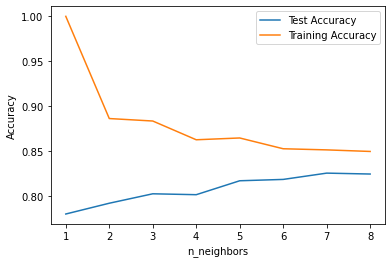

In [9]:
import numpy as np
import matplotlib.pyplot as plt
 
X_train, X_test, y_train, y_test = train_test_split(
             X, y, test_size = 0.2, random_state=42)
 
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
 
plt.plot(neighbors, test_accuracy, label = 'Test Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
 
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [10]:
from sklearn.metrics import roc_curve
pred_prob = knn.predict_proba(X_test)

In [11]:
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob[:,1], pos_label=1)

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
from sklearn.metrics import roc_auc_score

auc_score = roc_auc_score(y_test, pred_prob[:,1])

print(auc_score)

0.8632054985455719


In [12]:
knn_df.to_csv(r'C:\Users\dre2\Desktop\d209_task1_dataset.csv')